# Codon Readthrough Analyses

This notebook performs analyses on the processed readthrough data.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# Read in the CSV file
# Headers: gene_id,transcript_id,cds_id,parent,transcript_length,utr5,orf1,utr3,aa_sequence_orf1,stop_codon_orf1,bp_after_stop,utr3_length,first_stop_after_canonical,orf2_translation,orf1_nucleotide,orf2_nucleotide,has_readthrough

df = pd.read_csv('drosophila_readthrough_analysis.csv')
print(f"Loaded {len(df)} genes")
print(f"\nColumns: {list(df.columns)}")
df.head()

Loaded 13982 genes

Columns: ['gene_id', 'transcript_id', 'cds_id', 'parent', 'transcript_length', 'utr5', 'orf1', 'utr3', 'aa_sequence_orf1', 'stop_codon_orf1', 'bp_after_stop', 'utr3_length', 'first_stop_after_canonical', 'orf2_translation', 'orf1_nucleotide', 'orf2_nucleotide', 'has_readthrough']


,gene_id,transcript_id,cds_id,parent,transcript_length,utr5,orf1,utr3,aa_sequence_orf1,stop_codon_orf1,bp_after_stop,utr3_length,first_stop_after_canonical,orf2_translation,orf1_nucleotide,orf2_nucleotide,has_readthrough
0,FBgn0000008,FBtr0071764,a-PB,FBgn0000008,5173,CGAATACACAAATCAAAGCAAGTGTCTGTGTGATTGTAAAGAAGAA...,ATGCGTCTCTTCAAAACGCGCAAATCCACGGATACCTACAGCACAC...,TGCTAGTTAATGCCCGTATTTGACTTATTCCCATGGTAATACATAA...,MRLFKTRKSTDTYSTLAAQQQQQQQQQQQHQAEGSNISHSSNSSSN...,TAG,TGCTAGTTAA,307,TAG,C*,ATGCGTCTCTTCAAAACGCGCAAATCCACGGATACCTACAGCACAC...,TGCTAG,False
1,FBgn0000014,FBtr0306337,abd-A-PD,FBgn0000014,5269,TATTGCGCCATAAACGTTTCGCTGCTCGTAACGCCACAACGCTCGA...,ATGTATCCGTACGTGTCTAACCACCCTAGCAGCCATGGAGGGCTCT...,GCTGACAACCACCCATCGCCCAGCCGAGCCAACGAGCCAATCTTCC...,MYPYVSNHPSSHGGLSGMAGFTGLEDKSCSRYTDTVMNSYQSMSVP...,TAA,GCTGACAACC,2473,TAG,ADNHPSPSRANEPIFHQPHH*,ATGTATCCGTACGTGTCTAACCACCCTAGCAGCCATGGAGGGCTCT...,GCTGACAACCACCCATCGCCCAGCCGAGCCAACGAGCCAATCTTCC...,False
2,FBgn0000015,FBtr0415465,Abd-B-PJ,FBgn0000015,8184,GCAAATCAGTGCGGCTTGCGAGCTCAGCGGTGTGCAACATATGTTG...,ATGTCCATACAATTAGCGCCACTGCATATACCCGCCATCCGGGCCG...,CCCTTGGACAACAGCAGCGCTGGCGCCATGGGCTTTGCCACCTACT...,MSIQLAPLHIPAIRAGPGFETDTSAAVKRHTAHWAYNDEGFNQHYG...,TGA,CCCTTGGACA,1722,TAG,PLDNSSAGAMGFATY*,ATGTCCATACAATTAGCGCCACTGCATATACCCGCCATCCGGGCCG...,CCCTTGGACAACAGCAGCGCTGGCGCCATGGGCTTTGCCACCTACTAG,True
3,FBgn0000017,FBtr0112790,Abl-PB,FBgn0000017,12564,ACACGAGTGCAAGTTGGATTCCAATTCGATCCGTCGCGGTGCGTGG...,ATGGGGGCTCAGCAGGGCAAGGACAGGGGCGCCCACTCGGGAGGAG...,ATGATAAGACGGGGGATGGACGCGCCCGACCAACATCAGGGCATCT...,MGAQQGKDRGAHSGGGGSGAPVSCIGLSSSPVASVSPHCISSSSGV...,TAA,ATGATAAGAC,6908,TGA,MIRRGMDAPDQHQGIWLDAEGNFIKRK*,ATGGGGGCTCAGCAGGGCAAGGACAGGGGCGCCCACTCGGGAGGAG...,ATGATAAGACGGGGGATGGACGCGCCCGACCAACATCAGGGCATCT...,True
4,FBgn0000018,FBtr0080168,ao-PA,FBgn0000018,1794,TTAGTTACCTTCCGATCGGAAGAAGAACCCGGCTGACATTAGGAAT...,ATGGCCTACAAGAAGCGCCTACAATCGCAGAACCTCGTGCATCTGC...,ACTGCCTAATATGTACATACATGATTTTGTACATTTGTGTATAAAA...,MAYKKRLQSQNLVHLLQNRESGYTNVGQQPGRMPLLAYERLFYKCI...,TAG,ACTGCCTAAT,93,TAA,TA*,ATGGCCTACAAGAAGCGCCTACAATCGCAGAACCTCGTGCATCTGC...,ACTGCCTAA,False


In [18]:
# Write out the orf2_translation for genes with readthrough to a fasta file
with open('readthrough_orf2.fasta', 'w') as f:
    for _, row in df[df['has_readthrough']].iterrows():
        f.write(f">{row['gene_id']}\n{row['orf2_translation']}\n")  

## Analysis: ORF2 length

In [3]:
# Create subset of transcripts that have a second stop codon (in 3' UTR)
df_with_second_stop = df[df['first_stop_after_canonical'] != ''].copy()

print(f"Total genes: {len(df)}")
print(f"Genes with second stop codon: {len(df_with_second_stop)}")
print(f"Percentage with second stop: {len(df_with_second_stop) / len(df) * 100:.2f}%")

# Breakdown by readthrough status
print(f"\nBreakdown by readthrough status:")
print(f"  Readthrough genes with second stop: {len(df_with_second_stop[df_with_second_stop['has_readthrough']])}")
print(f"  Non-readthrough genes with second stop: {len(df_with_second_stop[~df_with_second_stop['has_readthrough']])}")

Total genes: 13982
Genes with second stop codon: 13982
Percentage with second stop: 100.00%

Breakdown by readthrough status:
  Readthrough genes with second stop: 405
  Non-readthrough genes with second stop: 13577


In [4]:
# Calculate ORF2 length (in nucleotides and amino acids)
df_with_second_stop['orf2_length_nt'] = df_with_second_stop['orf2_nucleotide'].str.len()
df_with_second_stop['orf2_length_aa'] = df_with_second_stop['orf2_translation'].str.replace('*', '').str.len()

print("ORF2 length statistics (amino acids):")
print(df_with_second_stop.groupby('has_readthrough')['orf2_length_aa'].describe())

ORF2 length statistics (amino acids):
                   count       mean         std  min   25%   50%    75%  \
has_readthrough                                                           
False            13133.0  16.674408   32.381112  0.0   5.0  11.0  21.00   
True               404.0  66.044554  108.332376  0.0  12.0  29.0  72.25   

                    max  
has_readthrough          
False            2674.0  
True              787.0  


/var/folders/z9/glw7thnn6njb3qzpvkgfsq0h0000gn/T/ipykernel_42942/1288970198.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(box_data, labels=['Readthrough', 'Non-readthrough'])


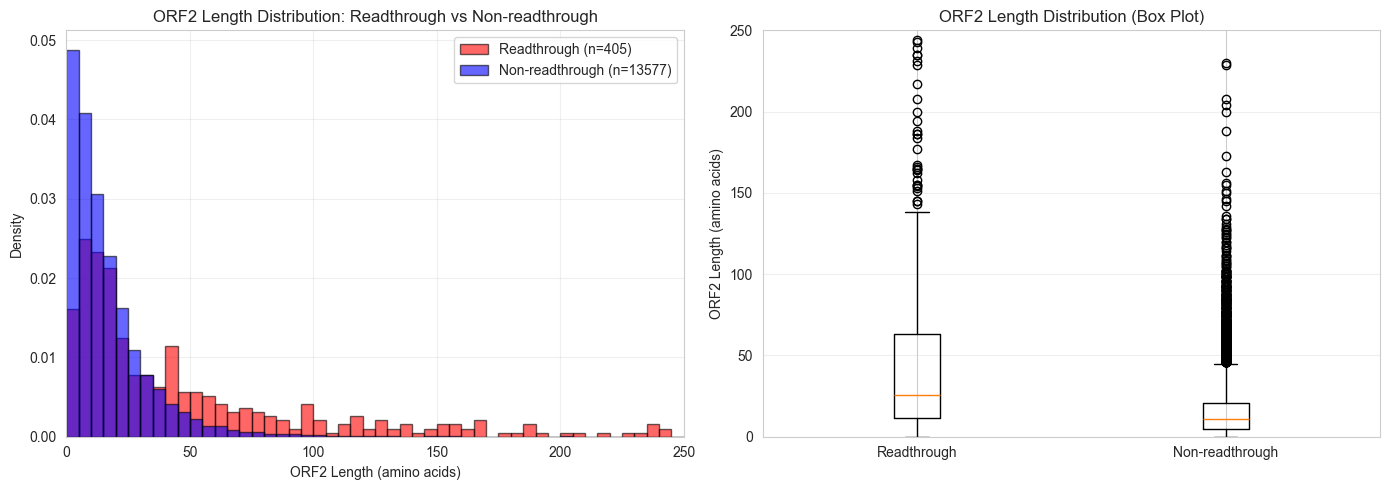


Plot saved as 'orf2_length_distribution.png'


In [5]:
# Create histogram of ORF2 length
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Separate data by readthrough status
orf2_readthrough = df_with_second_stop[df_with_second_stop['has_readthrough']]['orf2_length_aa']
orf2_non_readthrough = df_with_second_stop[~df_with_second_stop['has_readthrough']]['orf2_length_aa']

# Histogram 1: Overlaid histograms (normalized by frequency)
axes[0].hist(orf2_readthrough, bins=50, range=(0, 250), alpha=0.6, 
             label=f'Readthrough (n={len(orf2_readthrough)})', 
             color='red', edgecolor='black', density=True)
axes[0].hist(orf2_non_readthrough, bins=50, range=(0, 250), alpha=0.6, 
             label=f'Non-readthrough (n={len(orf2_non_readthrough)})', 
             color='blue', edgecolor='black', density=True)
axes[0].set_xlabel('ORF2 Length (amino acids)')
axes[0].set_ylabel('Density')
axes[0].set_title('ORF2 Length Distribution: Readthrough vs Non-readthrough')
axes[0].set_xlim(0, 250)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Histogram 2: Side-by-side box plots
box_data = [
    orf2_readthrough[orf2_readthrough <= 250],
    orf2_non_readthrough[orf2_non_readthrough <= 250]
]
axes[1].boxplot(box_data, labels=['Readthrough', 'Non-readthrough'])
axes[1].set_ylabel('ORF2 Length (amino acids)')
axes[1].set_title('ORF2 Length Distribution (Box Plot)')
axes[1].set_ylim(0, 250)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('orf2_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlot saved as 'orf2_length_distribution.png'")

In [6]:
# Statistical test to compare ORF2 lengths
from scipy import stats

# Mann-Whitney U test (non-parametric)
statistic, pvalue = stats.mannwhitneyu(orf2_readthrough, orf2_non_readthrough, alternative='two-sided')

print("Statistical comparison of ORF2 lengths:")
print(f"Mann-Whitney U test:")
print(f"  U statistic: {statistic:.2f}")
print(f"  P-value: {pvalue:.4e}")
print(f"  Significant at α=0.05: {'Yes' if pvalue < 0.05 else 'No'}")

# Calculate median and mean
print(f"\nReadthrough genes:")
print(f"  Median ORF2 length: {orf2_readthrough.median():.1f} aa")
print(f"  Mean ORF2 length: {orf2_readthrough.mean():.1f} aa")

print(f"\nNon-readthrough genes:")
print(f"  Median ORF2 length: {orf2_non_readthrough.median():.1f} aa")
print(f"  Mean ORF2 length: {orf2_non_readthrough.mean():.1f} aa")

Statistical comparison of ORF2 lengths:
Mann-Whitney U test:
  U statistic: nan
  P-value: nan
  Significant at α=0.05: No

Readthrough genes:
  Median ORF2 length: 29.0 aa
  Mean ORF2 length: 66.0 aa

Non-readthrough genes:
  Median ORF2 length: 11.0 aa
  Mean ORF2 length: 16.7 aa


## Analysis: Stop codon frequencies

In [9]:
# Count the frequency of first stop codons in ORF1 for genes with readthrough and genes without readthrough

canonical_stops = ['TAA', 'TAG', 'TGA']

first_stop_counts_readthrough = df_with_second_stop[df_with_second_stop['has_readthrough']]['stop_codon_orf1'].value_counts()
first_stop_counts_non_readthrough = df_with_second_stop[~df_with_second_stop['has_readthrough']]['stop_codon_orf1'].value_counts()

# For each canonical stop codon, get counts and frequencies. Compare between readthrough and non-readthrough genes.
print("\nFirst stop codon frequencies in ORF1:")
print(f"{'Stop Codon':<10} {'Readthrough Count':<20} {'Readthrough Frequency (%)':<25} {'Non-readthrough Count':<25} {'Non-readthrough Frequency (%)':<30}")
for codon in canonical_stops:
    count_readthrough = first_stop_counts_readthrough.get(codon, 0)
    count_non_readthrough = first_stop_counts_non_readthrough.get(codon, 0)
    freq_readthrough = (count_readthrough / len(df_with_second_stop[df_with_second_stop['has_readthrough']])) * 100 if len(df_with_second_stop[df_with_second_stop['has_readthrough']]) > 0 else 0
    freq_non_readthrough = (count_non_readthrough / len(df_with_second_stop[~df_with_second_stop['has_readthrough']])) * 100 if len(df_with_second_stop[~df_with_second_stop['has_readthrough']]) > 0 else 0
    print(f"{codon:<10} {count_readthrough:<20} {freq_readthrough:<25.2f} {count_non_readthrough:<25} {freq_non_readthrough:<30.2f}")


First stop codon frequencies in ORF1:
Stop Codon Readthrough Count    Readthrough Frequency (%) Non-readthrough Count     Non-readthrough Frequency (%) 
TAA        61                   15.06                     5711                      42.06                         
TAG        103                  25.43                     4707                      34.67                         
TGA        241                  59.51                     3155                      23.24                         


So we can see that in genes with verified readthrough, `TGA` stop codon is much more common than in genes without readthrough.

## Analysis: Codon usage bias

Assess codon frequencies in:

- all ORF1
- ORF2 with readthrough
- ORF2 without readthrough


In [14]:
# Create a dataframe for codon usage analysis
def codon_usage(sequence):
    codon_count = {}
    for i in range(0, len(sequence) - 2, 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:
            codon_count[codon] = codon_count.get(codon, 0) + 1
    return codon_count

# --- IGNORE ---
# Analyze codon usage in ORF1, ORF2 with readthrough, and ORF2 without readthrough
orf1_codon_counts = {}
orf2_readthrough_codon_counts = {}
orf2_non_readthrough_codon_counts = {}

for _, row in df.iterrows():
    # ORF1 codon usage
    orf1_seq = row['orf1_nucleotide']
    orf1_counts = codon_usage(orf1_seq)
    for codon, count in orf1_counts.items():
        orf1_codon_counts[codon] = orf1_codon_counts.get(codon, 0) + count
    
    # ORF2 codon usage
    orf2_seq = row['orf2_nucleotide']
    if pd.notna(orf2_seq) and len(orf2_seq) >= 3:
        orf2_counts = codon_usage(orf2_seq)
        if row['has_readthrough']:
            for codon, count in orf2_counts.items():
                orf2_readthrough_codon_counts[codon] = orf2_readthrough_codon_counts.get(codon, 0) + count
        else:
            for codon, count in orf2_counts.items():
                orf2_non_readthrough_codon_counts[codon] = orf2_non_readthrough_codon_counts.get(codon, 0) + count
# Convert to DataFrames for easier analysis
orf1_codon_df = pd.DataFrame.from_dict(orf1_codon_counts, orient='index', columns=['count']).sort_index()
orf2_readthrough_codon_df = pd.DataFrame.from_dict(orf2_readthrough_codon_counts, orient='index', columns=['count']).sort_index()
orf2_non_readthrough_codon_df = pd.DataFrame.from_dict(orf2_non_readthrough_codon_counts, orient='index', columns=['count']).sort_index()
# Normalize to frequencies
orf1_codon_df['frequency'] = orf1_codon_df['count'] / orf1_codon_df['count'].sum()
orf2_readthrough_codon_df['frequency'] = orf2_readthrough_codon_df['count'] / orf2_readthrough_codon_df['count'].sum()
orf2_non_readthrough_codon_df['frequency'] = orf2_non_readthrough_codon_df['count'] / orf2_non_readthrough_codon_df['count'].sum()
# Merge dataframes for comparison
codon_usage_df = orf1_codon_df[['frequency']].rename(columns={'frequency': 'ORF1'})
codon_usage_df = codon_usage_df.join(orf2_readthrough_codon_df[['frequency']].rename(columns={'frequency': 'ORF2_Readthrough'}), how='outer')
codon_usage_df = codon_usage_df.join(orf2_non_readthrough_codon_df[['frequency']].rename(columns={'frequency': 'ORF2_Non_Readthrough'}), how='outer')
codon_usage_df = codon_usage_df.fillna(0).sort_index()
print("\nCodon usage frequencies:")
print(codon_usage_df)


Codon usage frequencies:
         ORF1  ORF2_Readthrough  ORF2_Non_Readthrough
AAA  0.017766          0.010079              0.038252
AAC  0.025005          0.028317              0.020196
AAG  0.038505          0.022705              0.018471
AAT  0.021728          0.021487              0.030876
ACA  0.011661          0.015949              0.020520
ACC  0.021011          0.020749              0.013577
ACG  0.014262          0.017795              0.010044
ACT  0.010236          0.009525              0.016188
AGA  0.005651          0.005686              0.014173
AGC  0.020055          0.033301              0.015691
AGG  0.006766          0.009599              0.009655
AGT  0.012061          0.015543              0.014995
ATA  0.010159          0.007495              0.024887
ATC  0.022181          0.014472              0.017308
ATG  0.023439          0.018201              0.017325
ATT  0.017103          0.010153              0.029388
CAA  0.016125          0.027431              0.021934
CA

Pearson correlation coefficients between codon usage vectors:
ORF1 vs ORF2_Readthrough: r = 0.7892, p = 9.5049e-15
ORF1 vs ORF2_Non_Readthrough: r = 0.0420, p = 7.4151e-01
ORF2_Readthrough vs ORF2_Non_Readthrough: r = -0.0532, p = 6.7608e-01

Spearman correlation coefficients between codon usage vectors:
ORF1 vs ORF2_Readthrough: ρ = 0.8324, p = 1.5459e-17
ORF1 vs ORF2_Non_Readthrough: ρ = 0.1359, p = 2.8413e-01
ORF2_Readthrough vs ORF2_Non_Readthrough: ρ = 0.0391, p = 7.5928e-01


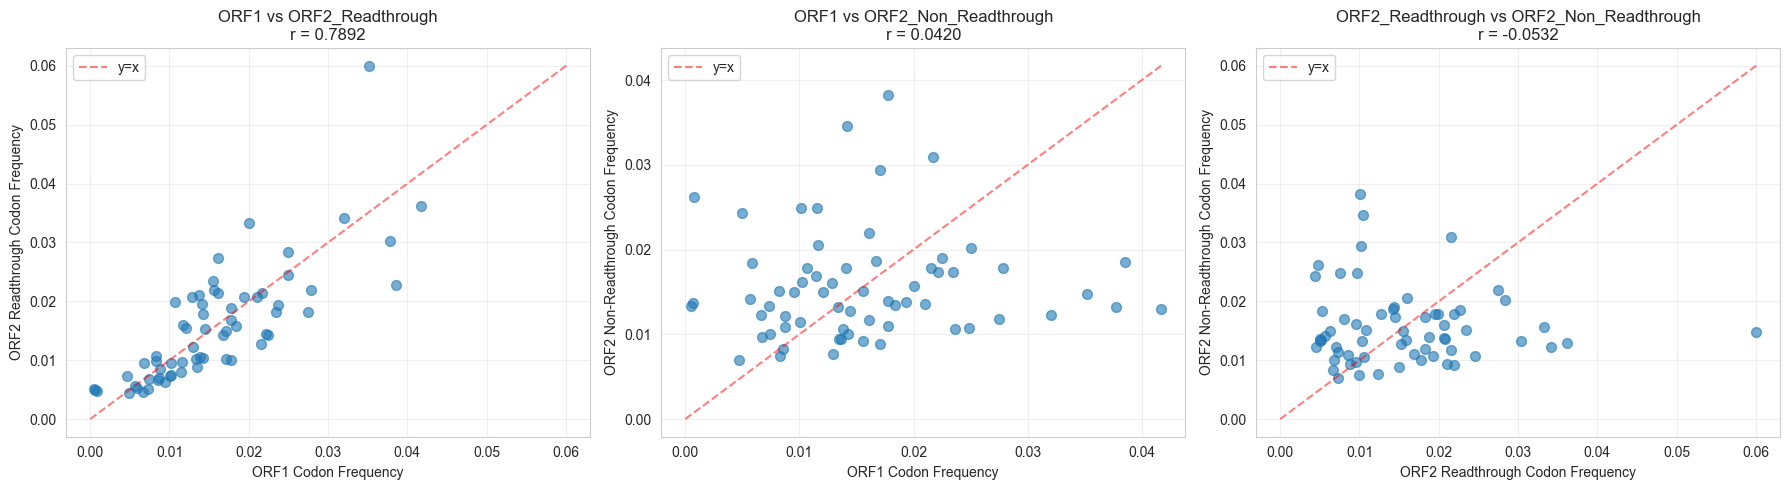


Top 10 codons enriched in ORF2_Readthrough vs ORF1:
         ORF1  ORF2_Readthrough  diff_RT_vs_ORF1
CAG  0.035163          0.060031         0.024868
AGC  0.020055          0.033301         0.013247
CAA  0.016125          0.027431         0.011306
CAT  0.010669          0.019936         0.009267
CAC  0.015548          0.023407         0.007859
GCA  0.012863          0.020675         0.007812
GCG  0.013660          0.021081         0.007421
CCG  0.015614          0.021967         0.006353
CCA  0.014124          0.019493         0.005370
TCG  0.016119          0.021487         0.005368

Top 10 codons depleted in ORF2_Readthrough vs ORF1:
         ORF1  ORF2_Readthrough  diff_RT_vs_ORF1
AAG  0.038505          0.022705        -0.015799
GTG  0.027477          0.018238        -0.009239
TTC  0.021572          0.012774        -0.008798
GAA  0.022477          0.014362        -0.008116
ATC  0.022181          0.014472        -0.007708
AAA  0.017766          0.010079        -0.007687
CTG  0.03776

In [16]:
# Examine similarities and differences in codon usage

# Calculate correlation between codon usage vectors
from scipy.stats import pearsonr, spearmanr

# Get common codons across all three datasets
all_codons = codon_usage_df.index.tolist()

# Calculate correlations
corr_orf1_orf2_readthrough, p_orf1_orf2_readthrough = pearsonr(
    codon_usage_df['ORF1'], 
    codon_usage_df['ORF2_Readthrough']
)

corr_orf1_orf2_non_readthrough, p_orf1_orf2_non_readthrough = pearsonr(
    codon_usage_df['ORF1'], 
    codon_usage_df['ORF2_Non_Readthrough']
)

corr_orf2_readthrough_orf2_non_readthrough, p_orf2_readthrough_orf2_non_readthrough = pearsonr(
    codon_usage_df['ORF2_Readthrough'], 
    codon_usage_df['ORF2_Non_Readthrough']
)

print("Pearson correlation coefficients between codon usage vectors:")
print(f"ORF1 vs ORF2_Readthrough: r = {corr_orf1_orf2_readthrough:.4f}, p = {p_orf1_orf2_readthrough:.4e}")
print(f"ORF1 vs ORF2_Non_Readthrough: r = {corr_orf1_orf2_non_readthrough:.4f}, p = {p_orf1_orf2_non_readthrough:.4e}")
print(f"ORF2_Readthrough vs ORF2_Non_Readthrough: r = {corr_orf2_readthrough_orf2_non_readthrough:.4f}, p = {p_orf2_readthrough_orf2_non_readthrough:.4e}")

# Spearman correlation (rank-based, more robust to outliers)
corr_spearman_orf1_orf2_rt, p_spearman_orf1_orf2_rt = spearmanr(
    codon_usage_df['ORF1'], 
    codon_usage_df['ORF2_Readthrough']
)

corr_spearman_orf1_orf2_non_rt, p_spearman_orf1_orf2_non_rt = spearmanr(
    codon_usage_df['ORF1'], 
    codon_usage_df['ORF2_Non_Readthrough']
)

corr_spearman_orf2_rt_orf2_non_rt, p_spearman_orf2_rt_orf2_non_rt = spearmanr(
    codon_usage_df['ORF2_Readthrough'], 
    codon_usage_df['ORF2_Non_Readthrough']
)

print("\nSpearman correlation coefficients between codon usage vectors:")
print(f"ORF1 vs ORF2_Readthrough: ρ = {corr_spearman_orf1_orf2_rt:.4f}, p = {p_spearman_orf1_orf2_rt:.4e}")
print(f"ORF1 vs ORF2_Non_Readthrough: ρ = {corr_spearman_orf1_orf2_non_rt:.4f}, p = {p_spearman_orf1_orf2_non_rt:.4e}")
print(f"ORF2_Readthrough vs ORF2_Non_Readthrough: ρ = {corr_spearman_orf2_rt_orf2_non_rt:.4f}, p = {p_spearman_orf2_rt_orf2_non_rt:.4e}")

# Create scatter plots to visualize correlations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: ORF1 vs ORF2_Readthrough
axes[0].scatter(codon_usage_df['ORF1'], codon_usage_df['ORF2_Readthrough'], alpha=0.6, s=50)
axes[0].set_xlabel('ORF1 Codon Frequency')
axes[0].set_ylabel('ORF2 Readthrough Codon Frequency')
axes[0].set_title(f'ORF1 vs ORF2_Readthrough\nr = {corr_orf1_orf2_readthrough:.4f}')
axes[0].plot([0, max(codon_usage_df['ORF1'].max(), codon_usage_df['ORF2_Readthrough'].max())], 
             [0, max(codon_usage_df['ORF1'].max(), codon_usage_df['ORF2_Readthrough'].max())], 
             'r--', alpha=0.5, label='y=x')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Plot 2: ORF1 vs ORF2_Non_Readthrough
axes[1].scatter(codon_usage_df['ORF1'], codon_usage_df['ORF2_Non_Readthrough'], alpha=0.6, s=50)
axes[1].set_xlabel('ORF1 Codon Frequency')
axes[1].set_ylabel('ORF2 Non-Readthrough Codon Frequency')
axes[1].set_title(f'ORF1 vs ORF2_Non_Readthrough\nr = {corr_orf1_orf2_non_readthrough:.4f}')
axes[1].plot([0, max(codon_usage_df['ORF1'].max(), codon_usage_df['ORF2_Non_Readthrough'].max())], 
             [0, max(codon_usage_df['ORF1'].max(), codon_usage_df['ORF2_Non_Readthrough'].max())], 
             'r--', alpha=0.5, label='y=x')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Plot 3: ORF2_Readthrough vs ORF2_Non_Readthrough
axes[2].scatter(codon_usage_df['ORF2_Readthrough'], codon_usage_df['ORF2_Non_Readthrough'], alpha=0.6, s=50)
axes[2].set_xlabel('ORF2 Readthrough Codon Frequency')
axes[2].set_ylabel('ORF2 Non-Readthrough Codon Frequency')
axes[2].set_title(f'ORF2_Readthrough vs ORF2_Non_Readthrough\nr = {corr_orf2_readthrough_orf2_non_readthrough:.4f}')
axes[2].plot([0, max(codon_usage_df['ORF2_Readthrough'].max(), codon_usage_df['ORF2_Non_Readthrough'].max())], 
             [0, max(codon_usage_df['ORF2_Readthrough'].max(), codon_usage_df['ORF2_Non_Readthrough'].max())], 
             'r--', alpha=0.5, label='y=x')
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.savefig('codon_usage_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate differences in codon usage
codon_usage_df['diff_RT_vs_ORF1'] = codon_usage_df['ORF2_Readthrough'] - codon_usage_df['ORF1']
codon_usage_df['diff_NonRT_vs_ORF1'] = codon_usage_df['ORF2_Non_Readthrough'] - codon_usage_df['ORF1']
codon_usage_df['diff_RT_vs_NonRT'] = codon_usage_df['ORF2_Readthrough'] - codon_usage_df['ORF2_Non_Readthrough']

# Find codons with largest differences
print("\nTop 10 codons enriched in ORF2_Readthrough vs ORF1:")
print(codon_usage_df.nlargest(10, 'diff_RT_vs_ORF1')[['ORF1', 'ORF2_Readthrough', 'diff_RT_vs_ORF1']])

print("\nTop 10 codons depleted in ORF2_Readthrough vs ORF1:")
print(codon_usage_df.nsmallest(10, 'diff_RT_vs_ORF1')[['ORF1', 'ORF2_Readthrough', 'diff_RT_vs_ORF1']])

print("\nTop 10 codons with largest difference between ORF2_Readthrough and ORF2_Non_Readthrough:")
print(codon_usage_df.nlargest(10, 'diff_RT_vs_NonRT')[['ORF2_Readthrough', 'ORF2_Non_Readthrough', 'diff_RT_vs_NonRT']])

## Analysis: amino acid frequencies

Same as for codon frequencies, but for amino acid frequencies

Amino acid usage frequencies:
       ORF1  ORF2_Readthrough  ORF2_Non_Readthrough
A  0.073133          0.092572              0.053289
C  0.019229          0.015816              0.033383
D  0.051597          0.041863              0.030022
E  0.064295          0.051271              0.033734
F  0.035813          0.023574              0.055294
G  0.060377          0.063901              0.041511
H  0.026269          0.044000              0.034734
I  0.049540          0.032606              0.075606
K  0.056381          0.033281              0.059906
L  0.091662          0.073908              0.099276
M  0.023486          0.018477              0.018299
N  0.046825          0.050558              0.053933
P  0.054972          0.066149              0.050741
Q  0.051390          0.088786              0.038799
R  0.055286          0.056143              0.062550
S  0.083358          0.108463              0.089384
T  0.057282          0.064988              0.063719
V  0.059100          0.040214     

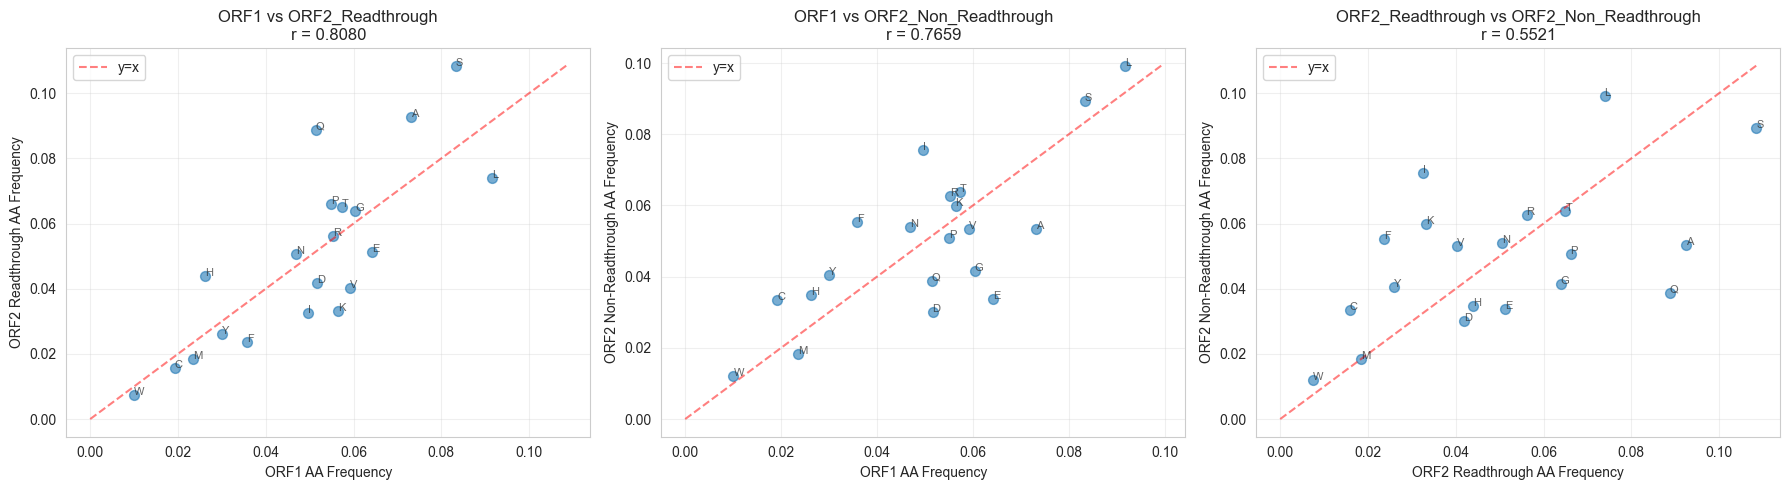


Top 10 amino acids enriched in ORF2_Readthrough vs ORF1:
       ORF1  ORF2_Readthrough  diff_RT_vs_ORF1
Q  0.051390          0.088786         0.037397
S  0.083358          0.108463         0.025105
A  0.073133          0.092572         0.019439
H  0.026269          0.044000         0.017731
P  0.054972          0.066149         0.011177
T  0.057282          0.064988         0.007706
N  0.046825          0.050558         0.003733
G  0.060377          0.063901         0.003523
R  0.055286          0.056143         0.000857
W  0.010055          0.007421        -0.002634

Top 10 amino acids depleted in ORF2_Readthrough vs ORF1:
       ORF1  ORF2_Readthrough  diff_RT_vs_ORF1
K  0.056381          0.033281        -0.023100
V  0.059100          0.040214        -0.018885
L  0.091662          0.073908        -0.017754
I  0.049540          0.032606        -0.016934
E  0.064295          0.051271        -0.013025
F  0.035813          0.023574        -0.012239
D  0.051597          0.041863        -

In [17]:
# Amino acid frequency analysis

# Function to count amino acid frequencies
def amino_acid_usage(aa_sequence):
    aa_count = {}
    for aa in aa_sequence:
        if aa != '*':  # Exclude stop codons
            aa_count[aa] = aa_count.get(aa, 0) + 1
    return aa_count

# Analyze amino acid usage in ORF1, ORF2 with readthrough, and ORF2 without readthrough
orf1_aa_counts = {}
orf2_readthrough_aa_counts = {}
orf2_non_readthrough_aa_counts = {}

for _, row in df.iterrows():
    # ORF1 amino acid usage
    orf1_aa_seq = row['aa_sequence_orf1']
    if pd.notna(orf1_aa_seq):
        orf1_counts = amino_acid_usage(orf1_aa_seq)
        for aa, count in orf1_counts.items():
            orf1_aa_counts[aa] = orf1_aa_counts.get(aa, 0) + count
    
    # ORF2 amino acid usage
    orf2_aa_seq = row['orf2_translation']
    if pd.notna(orf2_aa_seq) and len(orf2_aa_seq) > 1:  # More than just stop codon
        orf2_counts = amino_acid_usage(orf2_aa_seq)
        if row['has_readthrough']:
            for aa, count in orf2_counts.items():
                orf2_readthrough_aa_counts[aa] = orf2_readthrough_aa_counts.get(aa, 0) + count
        else:
            for aa, count in orf2_counts.items():
                orf2_non_readthrough_aa_counts[aa] = orf2_non_readthrough_aa_counts.get(aa, 0) + count

# Convert to DataFrames for easier analysis
orf1_aa_df = pd.DataFrame.from_dict(orf1_aa_counts, orient='index', columns=['count']).sort_index()
orf2_readthrough_aa_df = pd.DataFrame.from_dict(orf2_readthrough_aa_counts, orient='index', columns=['count']).sort_index()
orf2_non_readthrough_aa_df = pd.DataFrame.from_dict(orf2_non_readthrough_aa_counts, orient='index', columns=['count']).sort_index()

# Normalize to frequencies
orf1_aa_df['frequency'] = orf1_aa_df['count'] / orf1_aa_df['count'].sum()
orf2_readthrough_aa_df['frequency'] = orf2_readthrough_aa_df['count'] / orf2_readthrough_aa_df['count'].sum()
orf2_non_readthrough_aa_df['frequency'] = orf2_non_readthrough_aa_df['count'] / orf2_non_readthrough_aa_df['count'].sum()

# Merge dataframes for comparison
aa_usage_df = orf1_aa_df[['frequency']].rename(columns={'frequency': 'ORF1'})
aa_usage_df = aa_usage_df.join(orf2_readthrough_aa_df[['frequency']].rename(columns={'frequency': 'ORF2_Readthrough'}), how='outer')
aa_usage_df = aa_usage_df.join(orf2_non_readthrough_aa_df[['frequency']].rename(columns={'frequency': 'ORF2_Non_Readthrough'}), how='outer')
aa_usage_df = aa_usage_df.fillna(0).sort_index()

print("Amino acid usage frequencies:")
print(aa_usage_df)

# Calculate correlations
corr_aa_orf1_orf2_rt, p_aa_orf1_orf2_rt = pearsonr(
    aa_usage_df['ORF1'], 
    aa_usage_df['ORF2_Readthrough']
)

corr_aa_orf1_orf2_non_rt, p_aa_orf1_orf2_non_rt = pearsonr(
    aa_usage_df['ORF1'], 
    aa_usage_df['ORF2_Non_Readthrough']
)

corr_aa_orf2_rt_orf2_non_rt, p_aa_orf2_rt_orf2_non_rt = pearsonr(
    aa_usage_df['ORF2_Readthrough'], 
    aa_usage_df['ORF2_Non_Readthrough']
)

print("\n" + "="*80)
print("Pearson correlation coefficients between amino acid usage vectors:")
print(f"ORF1 vs ORF2_Readthrough: r = {corr_aa_orf1_orf2_rt:.4f}, p = {p_aa_orf1_orf2_rt:.4e}")
print(f"ORF1 vs ORF2_Non_Readthrough: r = {corr_aa_orf1_orf2_non_rt:.4f}, p = {p_aa_orf1_orf2_non_rt:.4e}")
print(f"ORF2_Readthrough vs ORF2_Non_Readthrough: r = {corr_aa_orf2_rt_orf2_non_rt:.4f}, p = {p_aa_orf2_rt_orf2_non_rt:.4e}")

# Spearman correlation
corr_spearman_aa_orf1_orf2_rt, p_spearman_aa_orf1_orf2_rt = spearmanr(
    aa_usage_df['ORF1'], 
    aa_usage_df['ORF2_Readthrough']
)

corr_spearman_aa_orf1_orf2_non_rt, p_spearman_aa_orf1_orf2_non_rt = spearmanr(
    aa_usage_df['ORF1'], 
    aa_usage_df['ORF2_Non_Readthrough']
)

corr_spearman_aa_orf2_rt_orf2_non_rt, p_spearman_aa_orf2_rt_orf2_non_rt = spearmanr(
    aa_usage_df['ORF2_Readthrough'], 
    aa_usage_df['ORF2_Non_Readthrough']
)

print("\nSpearman correlation coefficients between amino acid usage vectors:")
print(f"ORF1 vs ORF2_Readthrough: ρ = {corr_spearman_aa_orf1_orf2_rt:.4f}, p = {p_spearman_aa_orf1_orf2_rt:.4e}")
print(f"ORF1 vs ORF2_Non_Readthrough: ρ = {corr_spearman_aa_orf1_orf2_non_rt:.4f}, p = {p_spearman_aa_orf1_orf2_non_rt:.4e}")
print(f"ORF2_Readthrough vs ORF2_Non_Readthrough: ρ = {corr_spearman_aa_orf2_rt_orf2_non_rt:.4f}, p = {p_spearman_aa_orf2_rt_orf2_non_rt:.4e}")

# Create scatter plots to visualize correlations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: ORF1 vs ORF2_Readthrough
axes[0].scatter(aa_usage_df['ORF1'], aa_usage_df['ORF2_Readthrough'], alpha=0.6, s=50)
for idx, row in aa_usage_df.iterrows():
    axes[0].annotate(idx, (row['ORF1'], row['ORF2_Readthrough']), fontsize=8, alpha=0.7)
axes[0].set_xlabel('ORF1 AA Frequency')
axes[0].set_ylabel('ORF2 Readthrough AA Frequency')
axes[0].set_title(f'ORF1 vs ORF2_Readthrough\nr = {corr_aa_orf1_orf2_rt:.4f}')
axes[0].plot([0, max(aa_usage_df['ORF1'].max(), aa_usage_df['ORF2_Readthrough'].max())], 
             [0, max(aa_usage_df['ORF1'].max(), aa_usage_df['ORF2_Readthrough'].max())], 
             'r--', alpha=0.5, label='y=x')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Plot 2: ORF1 vs ORF2_Non_Readthrough
axes[1].scatter(aa_usage_df['ORF1'], aa_usage_df['ORF2_Non_Readthrough'], alpha=0.6, s=50)
for idx, row in aa_usage_df.iterrows():
    axes[1].annotate(idx, (row['ORF1'], row['ORF2_Non_Readthrough']), fontsize=8, alpha=0.7)
axes[1].set_xlabel('ORF1 AA Frequency')
axes[1].set_ylabel('ORF2 Non-Readthrough AA Frequency')
axes[1].set_title(f'ORF1 vs ORF2_Non_Readthrough\nr = {corr_aa_orf1_orf2_non_rt:.4f}')
axes[1].plot([0, max(aa_usage_df['ORF1'].max(), aa_usage_df['ORF2_Non_Readthrough'].max())], 
             [0, max(aa_usage_df['ORF1'].max(), aa_usage_df['ORF2_Non_Readthrough'].max())], 
             'r--', alpha=0.5, label='y=x')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Plot 3: ORF2_Readthrough vs ORF2_Non_Readthrough
axes[2].scatter(aa_usage_df['ORF2_Readthrough'], aa_usage_df['ORF2_Non_Readthrough'], alpha=0.6, s=50)
for idx, row in aa_usage_df.iterrows():
    axes[2].annotate(idx, (row['ORF2_Readthrough'], row['ORF2_Non_Readthrough']), fontsize=8, alpha=0.7)
axes[2].set_xlabel('ORF2 Readthrough AA Frequency')
axes[2].set_ylabel('ORF2 Non-Readthrough AA Frequency')
axes[2].set_title(f'ORF2_Readthrough vs ORF2_Non_Readthrough\nr = {corr_aa_orf2_rt_orf2_non_rt:.4f}')
axes[2].plot([0, max(aa_usage_df['ORF2_Readthrough'].max(), aa_usage_df['ORF2_Non_Readthrough'].max())], 
             [0, max(aa_usage_df['ORF2_Readthrough'].max(), aa_usage_df['ORF2_Non_Readthrough'].max())], 
             'r--', alpha=0.5, label='y=x')
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.savefig('amino_acid_usage_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate differences in amino acid usage
aa_usage_df['diff_RT_vs_ORF1'] = aa_usage_df['ORF2_Readthrough'] - aa_usage_df['ORF1']
aa_usage_df['diff_NonRT_vs_ORF1'] = aa_usage_df['ORF2_Non_Readthrough'] - aa_usage_df['ORF1']
aa_usage_df['diff_RT_vs_NonRT'] = aa_usage_df['ORF2_Readthrough'] - aa_usage_df['ORF2_Non_Readthrough']

# Find amino acids with largest differences
print("\n" + "="*80)
print("Top 10 amino acids enriched in ORF2_Readthrough vs ORF1:")
print(aa_usage_df.nlargest(10, 'diff_RT_vs_ORF1')[['ORF1', 'ORF2_Readthrough', 'diff_RT_vs_ORF1']])

print("\nTop 10 amino acids depleted in ORF2_Readthrough vs ORF1:")
print(aa_usage_df.nsmallest(10, 'diff_RT_vs_ORF1')[['ORF1', 'ORF2_Readthrough', 'diff_RT_vs_ORF1']])

print("\nTop 10 amino acids with largest difference between ORF2_Readthrough and ORF2_Non_Readthrough:")
print(aa_usage_df.nlargest(10, 'diff_RT_vs_NonRT')[['ORF2_Readthrough', 'ORF2_Non_Readthrough', 'diff_RT_vs_NonRT']])

print("\nTop 10 amino acids depleted in ORF2_Readthrough vs ORF2_Non_Readthrough:")
print(aa_usage_df.nsmallest(10, 'diff_RT_vs_NonRT')[['ORF2_Readthrough', 'ORF2_Non_Readthrough', 'diff_RT_vs_NonRT']])

So the correlation cofficients are higher for orf2 without readthrough for amino acids vs without readthrough. That seems odd to me.